In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcP
%matplotlib inline


In [4]:
df = pd.read_csv('data.csv')
df.head()



,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('size')['size'].agg('count')


size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [7]:
df = df.drop('society', axis='columns')
df.head()


,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [8]:
df.isnull().sum()


area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [9]:
from math import floor
balcony_median = float(floor(df.balcony.median()))
bath_median = float(floor(df.bath.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)


In [10]:
df.isnull().sum()


area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [11]:
df = df.dropna()
df.isnull().sum()


area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [12]:
# Converting the size column to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')
df.groupby('bhk')['bhk'].agg('count')


bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [13]:
df.head()

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
0,Super built-up Area,19-Dec,1056,2.0,1.0,39.07,Alandi Road,2
1,Plot Area,Ready To Move,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,Built-up Area,Ready To Move,1440,2.0,3.0,62.00,Anandnagar,3
3,Super built-up Area,Ready To Move,1521,3.0,1.0,95.00,Aundh,3
4,Super built-up Area,Ready To Move,1200,2.0,1.0,51.00,Aundh Road,2


In [14]:
Index_def = df[df['bhk'] > 6].index
df = df.drop(Index_def)




In [15]:
df.groupby('bhk')['bhk'].agg('count')


bhk
1     656
2    5527
3    4857
4    1417
5     356
6     221
Name: bhk, dtype: int64

In [16]:
df.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [18]:
df[~df['total_sqft'].apply(isFloat)]


,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [20]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()


,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [21]:
df.isna().sum()


area_type          0
availability       0
bath               0
balcony            0
price              0
site_location      0
bhk                0
new_total_sqft    43
dtype: int64

In [22]:
df = df.dropna()
df.isna().sum()


area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

Feature Engineering

In [23]:
df1 = df.copy()

# the price column is in Lakhs multiply by 100000
df1['price_per_sqft'] = (df1['price']*100000)/df1['new_total_sqft']
df1.head()


,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [24]:
locations = list(df['site_location'].unique())
print(len(locations))


97


In [25]:
# Removing the extra spaces at the end
df1.site_location = df1.site_location.apply(lambda x: x.strip())

# Calulating all the unique values in 'site_location' column
location_stats = df1.groupby('site_location')['site_location'].agg(
    'count').sort_values(ascending=False)
location_stats


site_location
Ganesh Peth            139
Kalyani Nagar          139
Paud Road              139
Deccan Gymkhana        139
Mangalwar peth         138
                      ... 
Salunke Vihar          131
Narayangaon            131
Fatima Nagar           130
Mahatma Gandhi Road    130
other                    1
Name: site_location, Length: 97, dtype: int64

In [26]:
print(len(location_stats[location_stats<=10]), len(df1.site_location.unique()))

1 97


In [27]:


df1.head()


,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [28]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats <= 10]

df1.site_location = df1.site_location.apply(
    lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.site_location.unique())


97

In [29]:
# Checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg(
    'count').sort_values(ascending=False)


availability
Ready To Move    10287
18-Dec             306
18-May             293
18-Apr             267
18-Aug             199
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

In [30]:


# Labelling the dates into Not Ready
dates = df1.groupby('availability')['availability'].agg(
    'count').sort_values(ascending=False)

dates_not_ready = dates[dates < 10000]
df1.availability = df1.availability.apply(
    lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())


2

In [31]:
df1.head()


,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0,3699.810606
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,4250.000000


In [32]:


# Checking the unique values in 'area_type' column
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

# Since the column has only few unique values, we don't perform any operation


area_type
Super built-up  Area    8749
Built-up  Area          2353
Plot  Area              1806
Carpet  Area              83
Name: area_type, dtype: int64

Removing outliers

In [33]:
# Removing the rows that have 1 Room for less than 300sqft

df2 = df1[~(df1.new_total_sqft/df1.bhk < 300)]
print(len(df2), len(df1))


12421 12991


In [34]:


df2.price_per_sqft.describe()


count     12421.000000
mean       6290.756896
std        4115.676162
min         267.829813
25%        4217.325228
50%        5296.442688
75%        6907.894737
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD
def remove_pps_outliers(df):

    df_out = pd.DataFrame()

    for key, sub_df in df.groupby('site_location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft > (m-sd))
                           & (sub_df.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)

    return df_out


df3 = remove_pps_outliers(df2)
print(len(df2), len(df3))


12421 10843


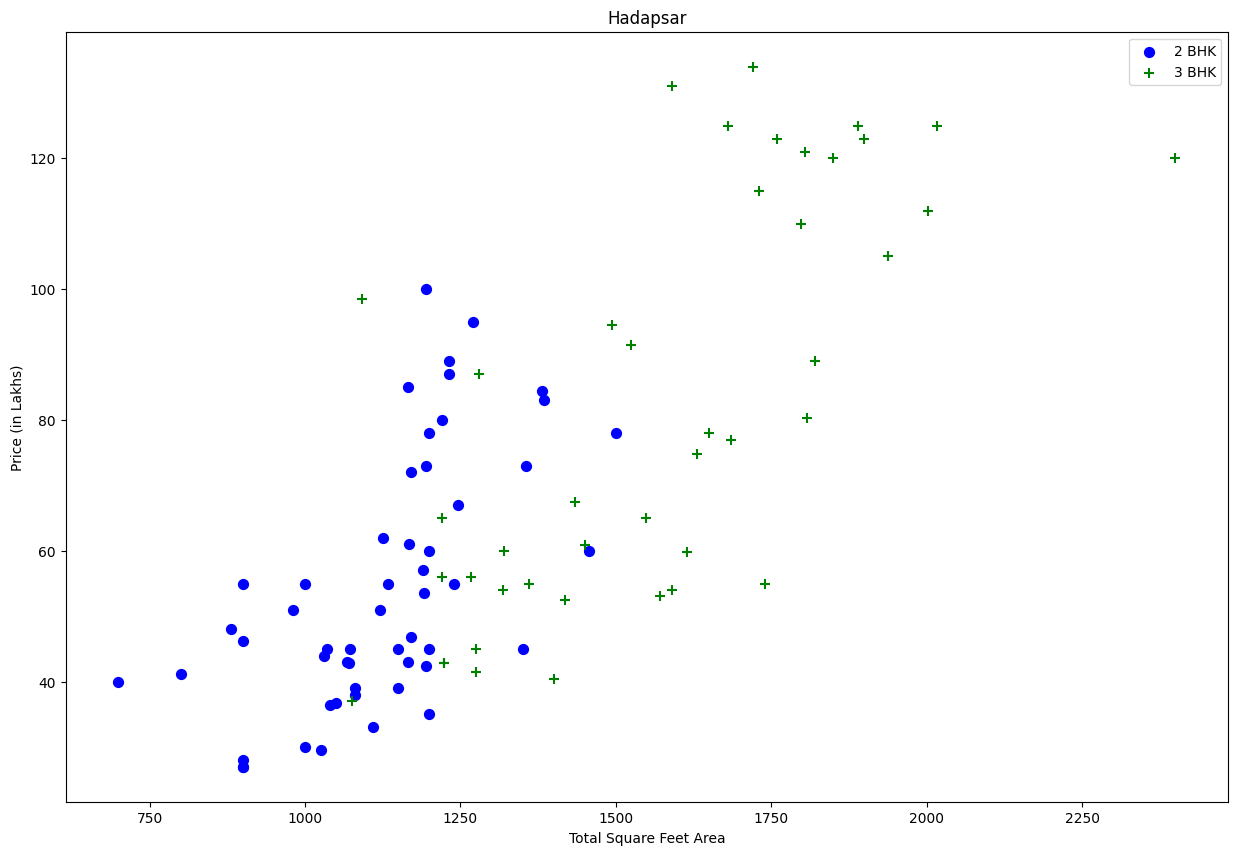

In [36]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location) & (df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price,
                color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price,
                color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(site_location)
    plt.legend()


plot_scatter_chart(df3, 'Hadapsar')


In [37]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}

        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')


df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))


10843 7375


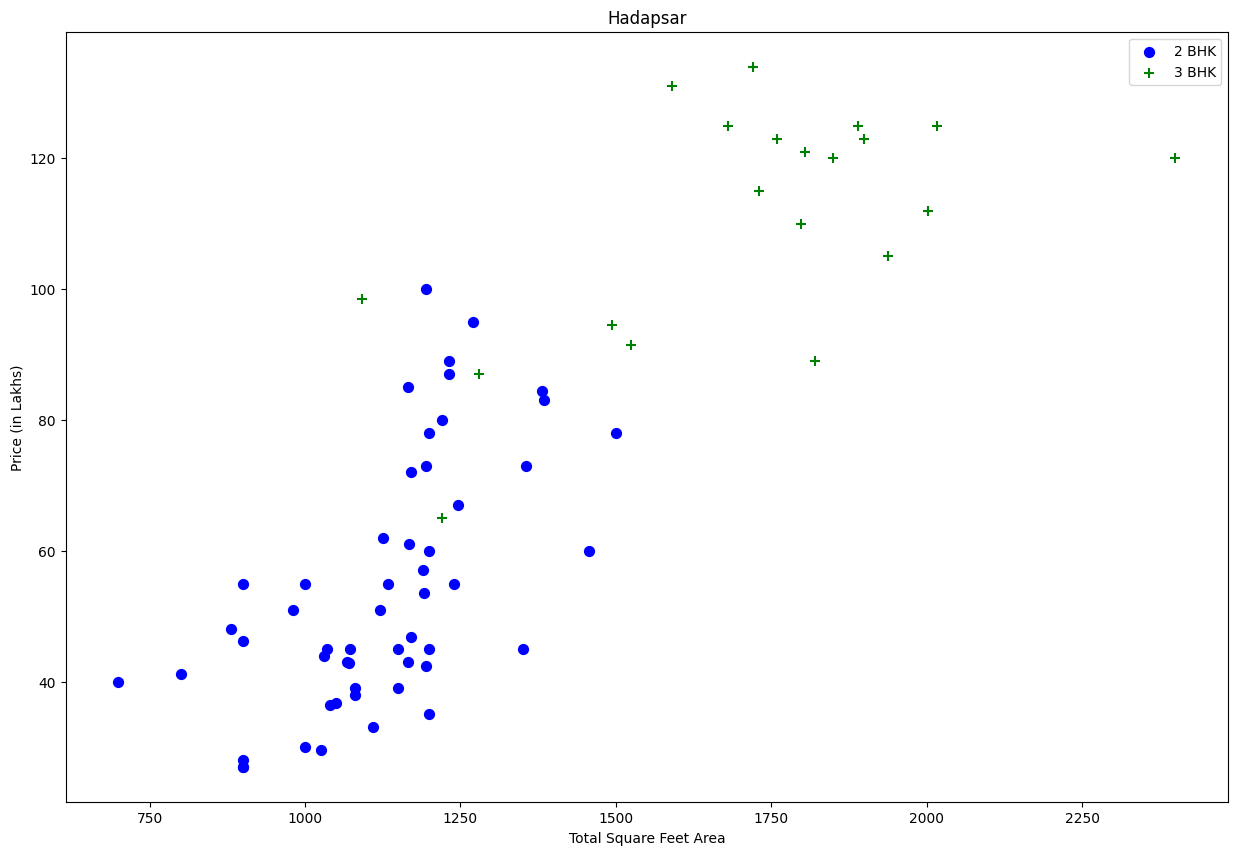

In [38]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

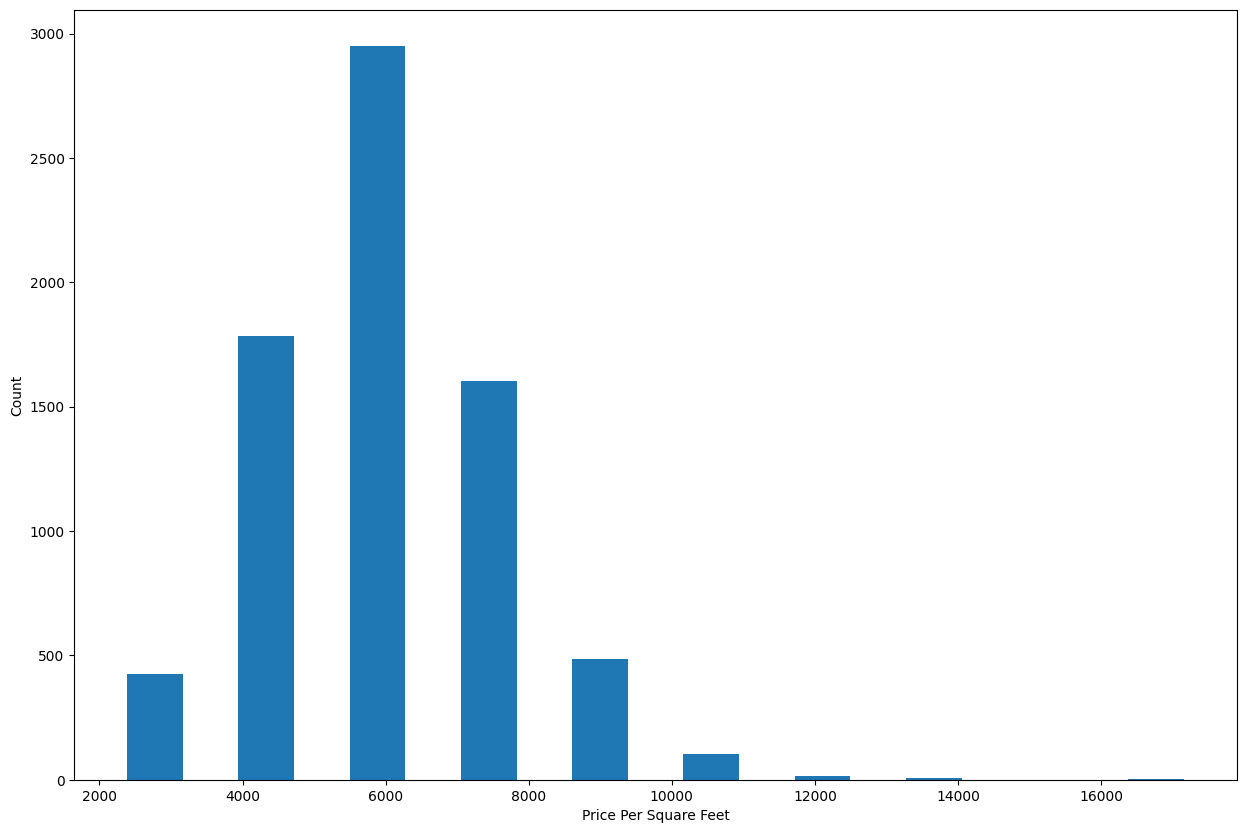

In [39]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

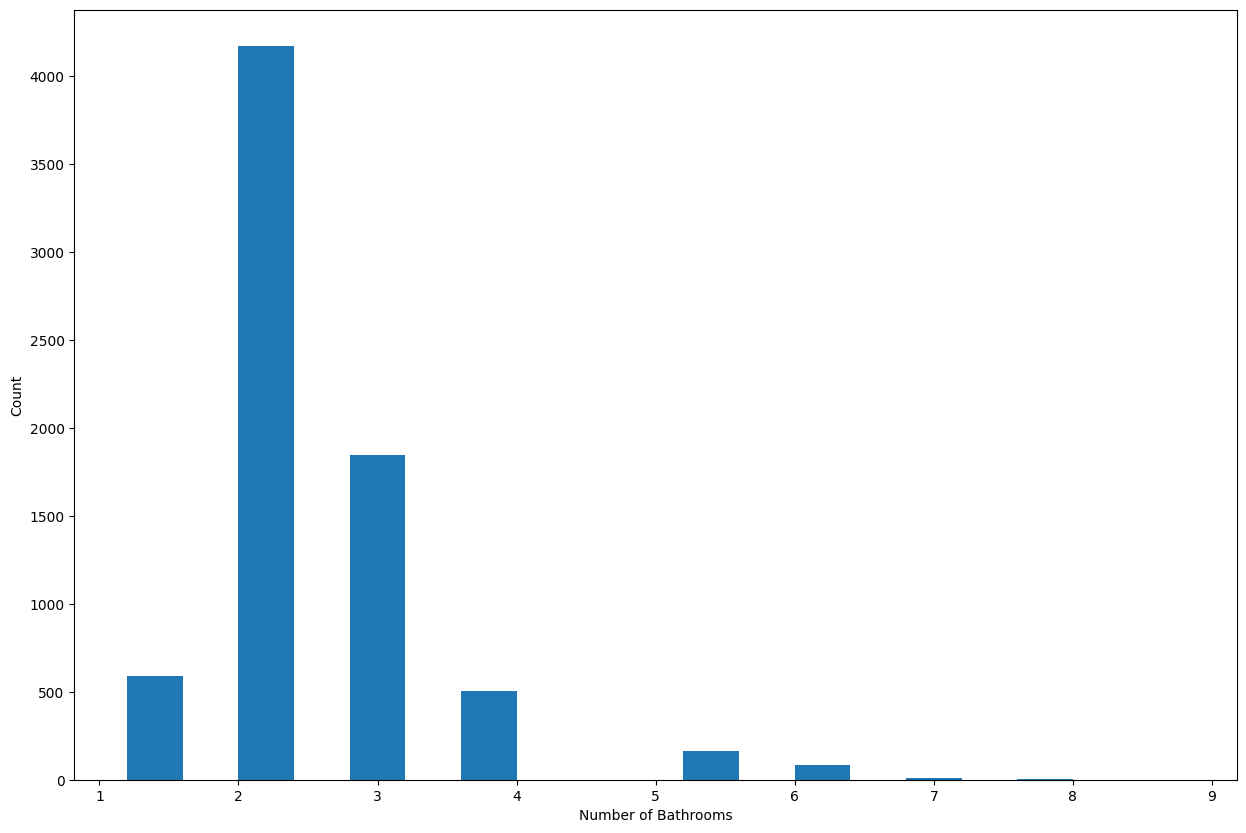

In [40]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')


In [41]:
df5 = df4[df4.bath < (df4.bhk+2)]
print(len(df4), len(df5))


7375 7312


In [42]:
df5.tail()


,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10829,Super built-up Area,Not Ready,2.0,1.0,67.0,Yerawada,2,1165.0,5751.072961
10834,Built-up Area,Ready To Move,6.0,2.0,115.0,Yerawada,6,3500.0,3285.714286
10837,Built-up Area,Not Ready,2.0,2.0,353.0,Yerawada,5,3210.0,10996.884735
10838,Super built-up Area,Ready To Move,2.0,2.0,54.0,Yerawada,2,1050.0,5142.857143
10842,Super built-up Area,Not Ready,2.0,1.0,70.0,Yerawada,2,1132.0,6183.745583


In [43]:


# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')


In [44]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.site_location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [45]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [46]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [47]:
df6.drop(['area_type', 'availability', 'site_location'],
         axis='columns', inplace=True)
df6.head(10)


,bath,balcony,price,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,2.0,1.0,39.07,2,1056.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,245.00,4,2894.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2.0,2.0,50.00,2,1084.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,2.0,80.00,2,1230.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.0,2.0,130.00,3,1750.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2.0,1.0,41.00,2,995.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,2.0,1.0,95.00,2,1360.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2.0,2.0,50.00,2,1040.0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
10,3.0,2.0,86.06,3,1655.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12,5.0,3.0,198.00,4,2790.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df6.shape


(7312, 105)

In [49]:


# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']


In [50]:


# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor



In [51]:
# Creating a function for GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                
            }
        },

        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
    }

    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(
            model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])


find_best_model(X, y)


,model,best_parameters,accuracy
0,linear_regression,{},0.867726
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.862456
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.818944


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=20)


In [53]:
X.head()

,bath,balcony,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,Ready To Move,Built-up Area,Carpet Area,Plot Area
0,2.0,1.0,2,1056.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1.0,4,2894.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2.0,2.0,2,1084.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2.0,2.0,2,1230.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.0,2.0,3,1750.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Creating Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)


LinearRegression(fit_intercept=False)

In [56]:
model.score(X_test, y_test)


0.8566182679027475

In [57]:
X.columns


Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada', 'Ready To Move', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'],
      dtype='object', length=104)

In [58]:
# For finding the appropriate location
np.where(X.columns == 'Balaji Nagar')[0][0]


9

In [59]:


# For finding the appropriate area_type
np.where(X.columns == 'Built-up  Area')[0][0]


101

In [60]:
# For finding the appropriate availability
np.where(X.columns=='Ready To Move')[0][0]

100

In [61]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, sqft, area_type, availability):

    loc_index, area_index, avail_index = -1, -1, -1

    if location != 'other':
        loc_index = int(np.where(X.columns == location)[0][0])

    if area_type != 'Super built-up  Area':
        area_index = np.where(X.columns == area_type)[0][0]

    if availability != 'Not Ready':
        avail_index = np.where(X.columns == availability)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft

    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1

    return model.predict([x])[0]


In [62]:
import warnings
warnings.filterwarnings(
    "ignore", message="X does not have valid feature names")



In [63]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, sqft, area_type, availability.
prediction('Balaji Nagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')


50.91840289168859